In [74]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [75]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 500

In [76]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantData/rice_leaf_diseases",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 120 files belonging to 3 classes.


In [77]:
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# VIsualiztion

(32, 256, 256, 3)
[2 0 2 2 0 2 2 2 0 1 1 2 0 0 1 0 0 1 2 2 0 0 2 1 0 2 1 1 1 0 0 1]


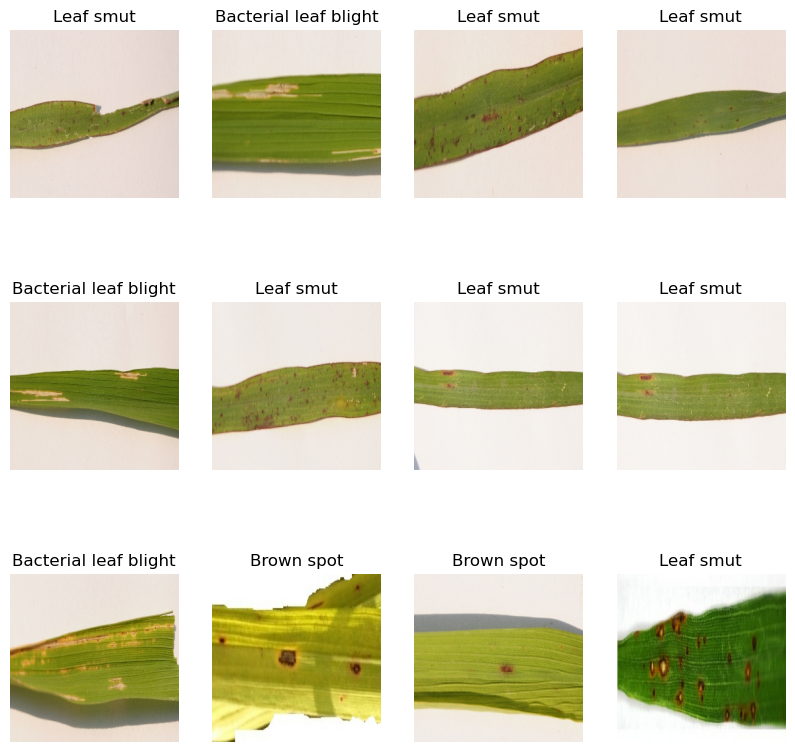

In [78]:
plt.figure(figsize = (10, 10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.title(class_names[labels_batch[i]])

        plt.axis("off")

# training and testing

80 = training
10 = validation
10 = test

In [79]:
train_size = 0.8
len(dataset)*train_size

3.2

In [80]:
train_ds = dataset.take(54)
len(train_ds)

4

In [81]:
test_ds = dataset.skip(54)
len(test_ds)

0

In [82]:
val_size = 0.1
len(dataset)*val_size

0.4

In [83]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [84]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):

    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [85]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [86]:
len(train_ds)

3

In [87]:
len(val_ds)

0

In [88]:
len(test_ds)

1

In [89]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [90]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.8451593  0.78786767 0.07346813]
  [0.85882354 0.8039216  0.08033089]
  [0.8550858  0.8039216  0.059375  ]
  ...
  [0.9085172  0.8261642  0.2336397 ]
  [0.8726103  0.79025733 0.19025736]
  [0.8579657  0.7756128  0.17561275]]

 [[0.8501848  0.7928931  0.0784936 ]
  [0.8583932  0.80349123 0.07916475]
  [0.8610969  0.8099327  0.06538612]
  ...
  [0.89370453 0.8113932  0.21531479]
  [0.86740434 0.7859399  0.18238597]
  [0.85727155 0.7758071  0.17225318]]

 [[0.8609289  0.8036372  0.0892377 ]
  [0.8574731  0.8025711  0.07667165]
  [0.8739483  0.82278407 0.0782375 ]
  ...
  [0.8620361  0.7798139  0.1761374 ]
  [0.8562744  0.77670944 0.1655575 ]
  [0.8557876  0.77622265 0.16507065]]

 ...

 [[0.6753954  0.6276822  0.26023284]
  [0.68540806 0.6358652  0.26902574]
  [0.7000756  0.6494873  0.28299633]
  ...
  [0.8974346  0.87782675 0.38370913]
  [0.9238468  0.90423894 0.4101213 ]
  [0.91850203 0.8988942  0.40477654]]

 [[0.5743059  0.5243667  0.16145833]
  [0.585387   0.5348647  0.17215073]


In [91]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [92]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [93]:
IMAGE_SIZE

256

In [94]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [95]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_10 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [96]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [97]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/500
3/3 [==============================] - 8s 2s/step - loss: 1.1157 - accuracy: 0.2955
Epoch 2/500
3/3 [==============================] - 5s 2s/step - loss: 1.1046 - accuracy: 0.3068
Epoch 3/500
3/3 [==============================] - 5s 2s/step - loss: 1.0978 - accuracy: 0.3977
Epoch 4/500
3/3 [==============================] - 5s 2s/step - loss: 1.0984 - accuracy: 0.3864
Epoch 5/500
3/3 [==============================] - 5s 2s/step - loss: 1.0941 - accuracy: 0.3864
Epoch 6/500
3/3 [==============================] - 5s 2s/step - loss: 1.0930 - accuracy: 0.3864
Epoch 7/500
3/3 [==============================] - 5s 2s/step - loss: 1.0865 - accuracy: 0.3864
Epoch 8/500
3/3 [==============================] - 5s 2s/step - loss: 1.0841 - accuracy: 0.3864
Epoch 9/500
3/3 [==============================] - 5s 2s/step - loss: 1.0802 - accuracy: 0.3864
Epoch 10/500
3/3 [==============================] - 5s 2s/step - loss: 1.0672 - accuracy: 0.3864
Epoch 11/500
3/3 [=====================

In [98]:
len(test_ds)

1

In [99]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.3415 - accuracy: 0.9688


In [100]:
scores

[0.34145084023475647, 0.96875]

### Plotting the Accuracy and Loss Curves

In [101]:
history

In [102]:
history.params

{'verbose': 1, 'epochs': 500, 'steps': 3}

In [103]:
history.history.keys()    

dict_keys(['loss', 'accuracy'])

In [104]:
len(history.history['loss'])

500

In [109]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

In [110]:
history.history['accuracy']

[0.2954545319080353,
 0.3068181872367859,
 0.39772728085517883,
 0.3863636255264282,
 0.3863636255264282,
 0.3863636255264282,
 0.3863636255264282,
 0.3863636255264282,
 0.3863636255264282,
 0.3863636255264282,
 0.3863636255264282,
 0.39772728085517883,
 0.3863636255264282,
 0.4545454680919647,
 0.5681818127632141,
 0.6363636255264282,
 0.625,
 0.6704545617103577,
 0.6818181872367859,
 0.6818181872367859,
 0.6931818127632141,
 0.625,
 0.7045454382896423,
 0.6363636255264282,
 0.6704545617103577,
 0.6704545617103577,
 0.7386363744735718,
 0.7159090638160706,
 0.7272727489471436,
 0.7840909361839294,
 0.7159090638160706,
 0.6818181872367859,
 0.625,
 0.6363636255264282,
 0.6704545617103577,
 0.7159090638160706,
 0.7272727489471436,
 0.7386363744735718,
 0.7613636255264282,
 0.7727272510528564,
 0.75,
 0.75,
 0.7727272510528564,
 0.7727272510528564,
 0.7386363744735718,
 0.6704545617103577,
 0.8181818127632141,
 0.7272727489471436,
 0.7954545617103577,
 0.8068181872367859,
 0.75,
 0.76136

Text(0.5, 1.0, 'Training Accuracy')

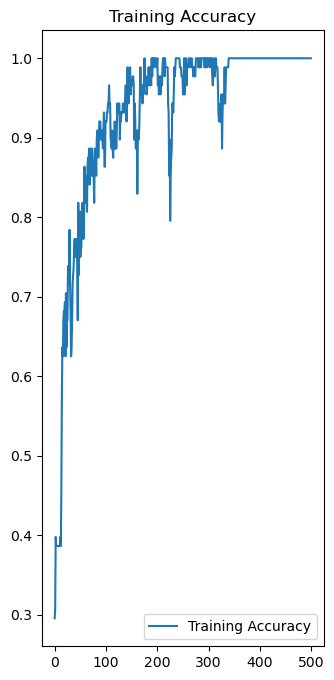

In [111]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
# plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(range(EPOCHS), loss, label='Training Loss')
# plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


# Prediction on image

first image to predict
actual label: Brown spot
predicted label: Brown spot


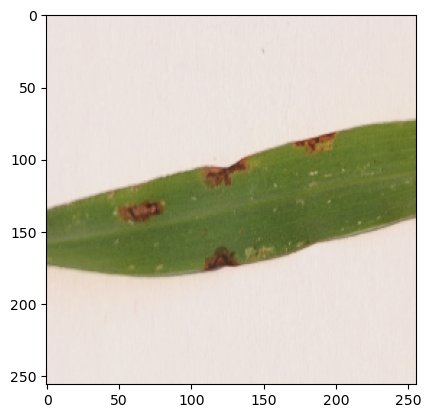

In [112]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Function for interference

In [113]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


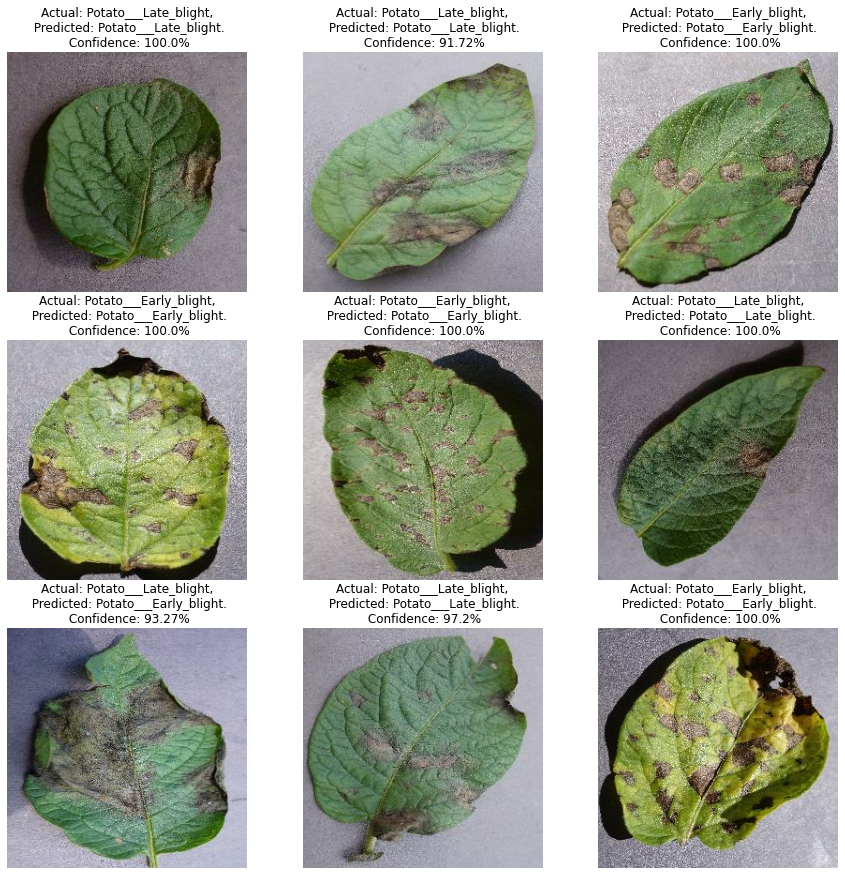

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


### Saving the Model
We append the model to the list of models as a new version

In [114]:
import os
model_version = max([int(i) for i in os.listdir("C:/Potato Project/training/models/Rice_Leaf_models") + [0]])+1
model.save(f"C:/Potato Project/training/models/Rice_Leaf_models/{model_version}")


INFO:tensorflow:Assets written to: C:/Potato Project/training/models/Rice_Leaf_models/1\assets


In [116]:
model.save("../rice.h5")
